In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # to handle imbalance

In [4]:
df = pd.read_excel("glass.xlsx",sheet_name=1)

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:

df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


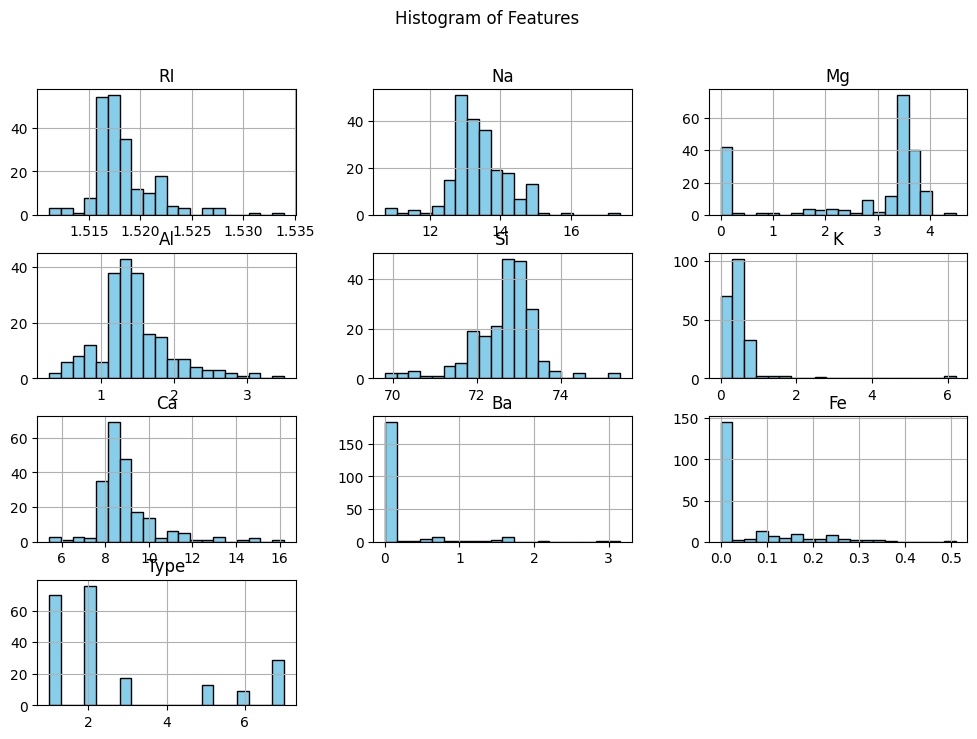

In [11]:
# Data Visualization
df.hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histogram of Features")
plt.show()

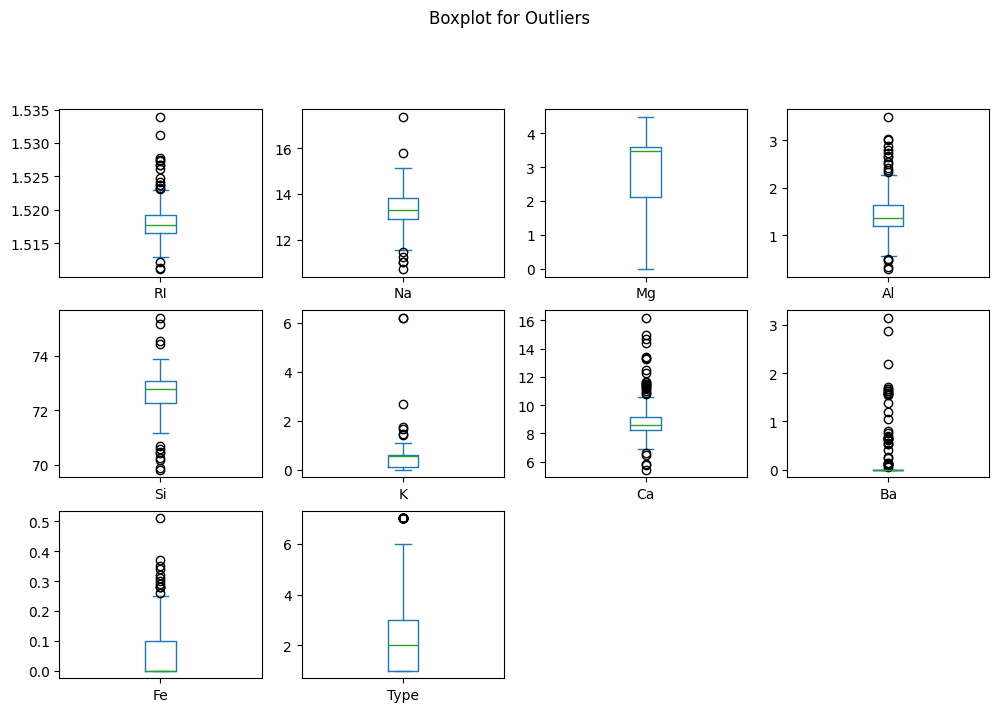

In [12]:
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(12,10))
plt.suptitle("Boxplot for Outliers")
plt.show()

In [13]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

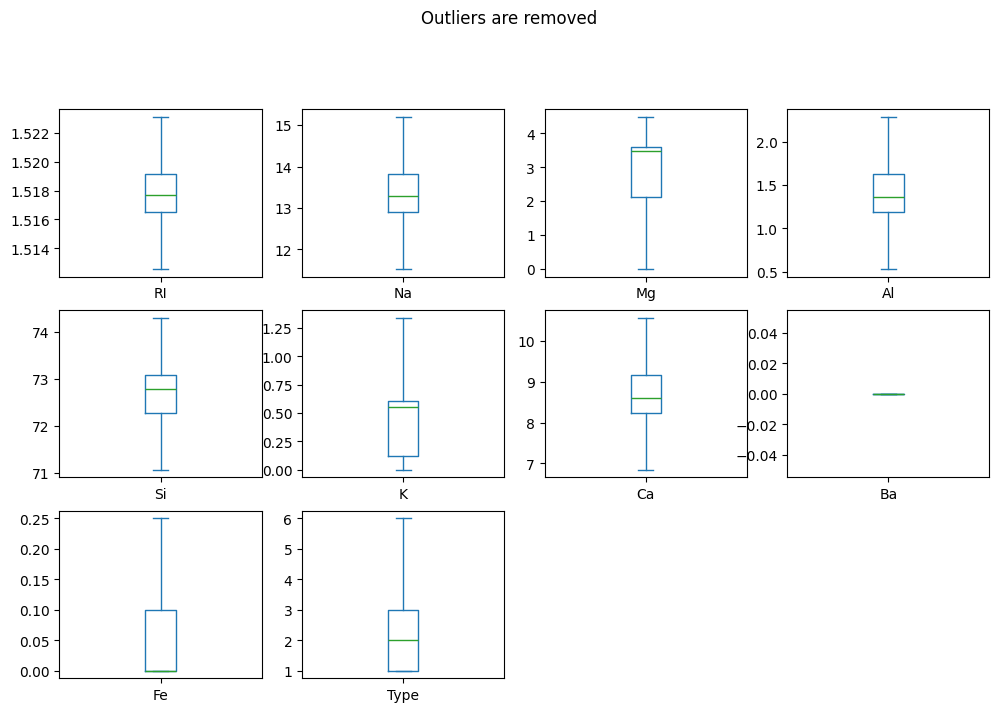

In [14]:
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(12,10))
plt.suptitle("Outliers are removed")
plt.show()

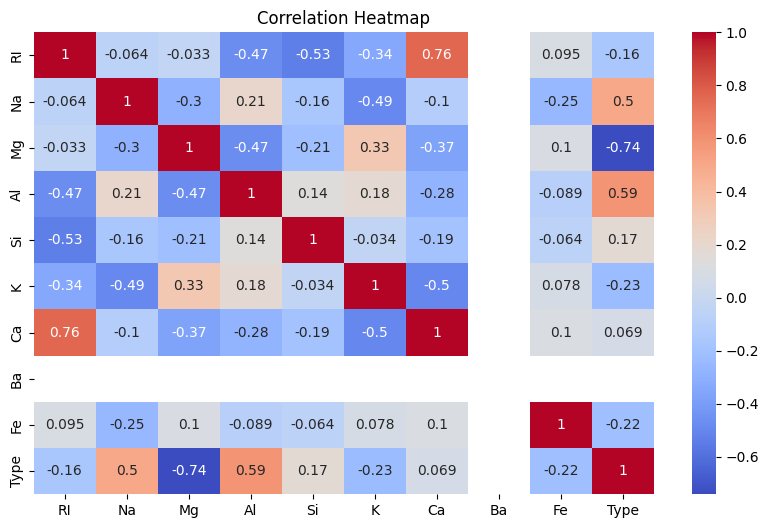

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

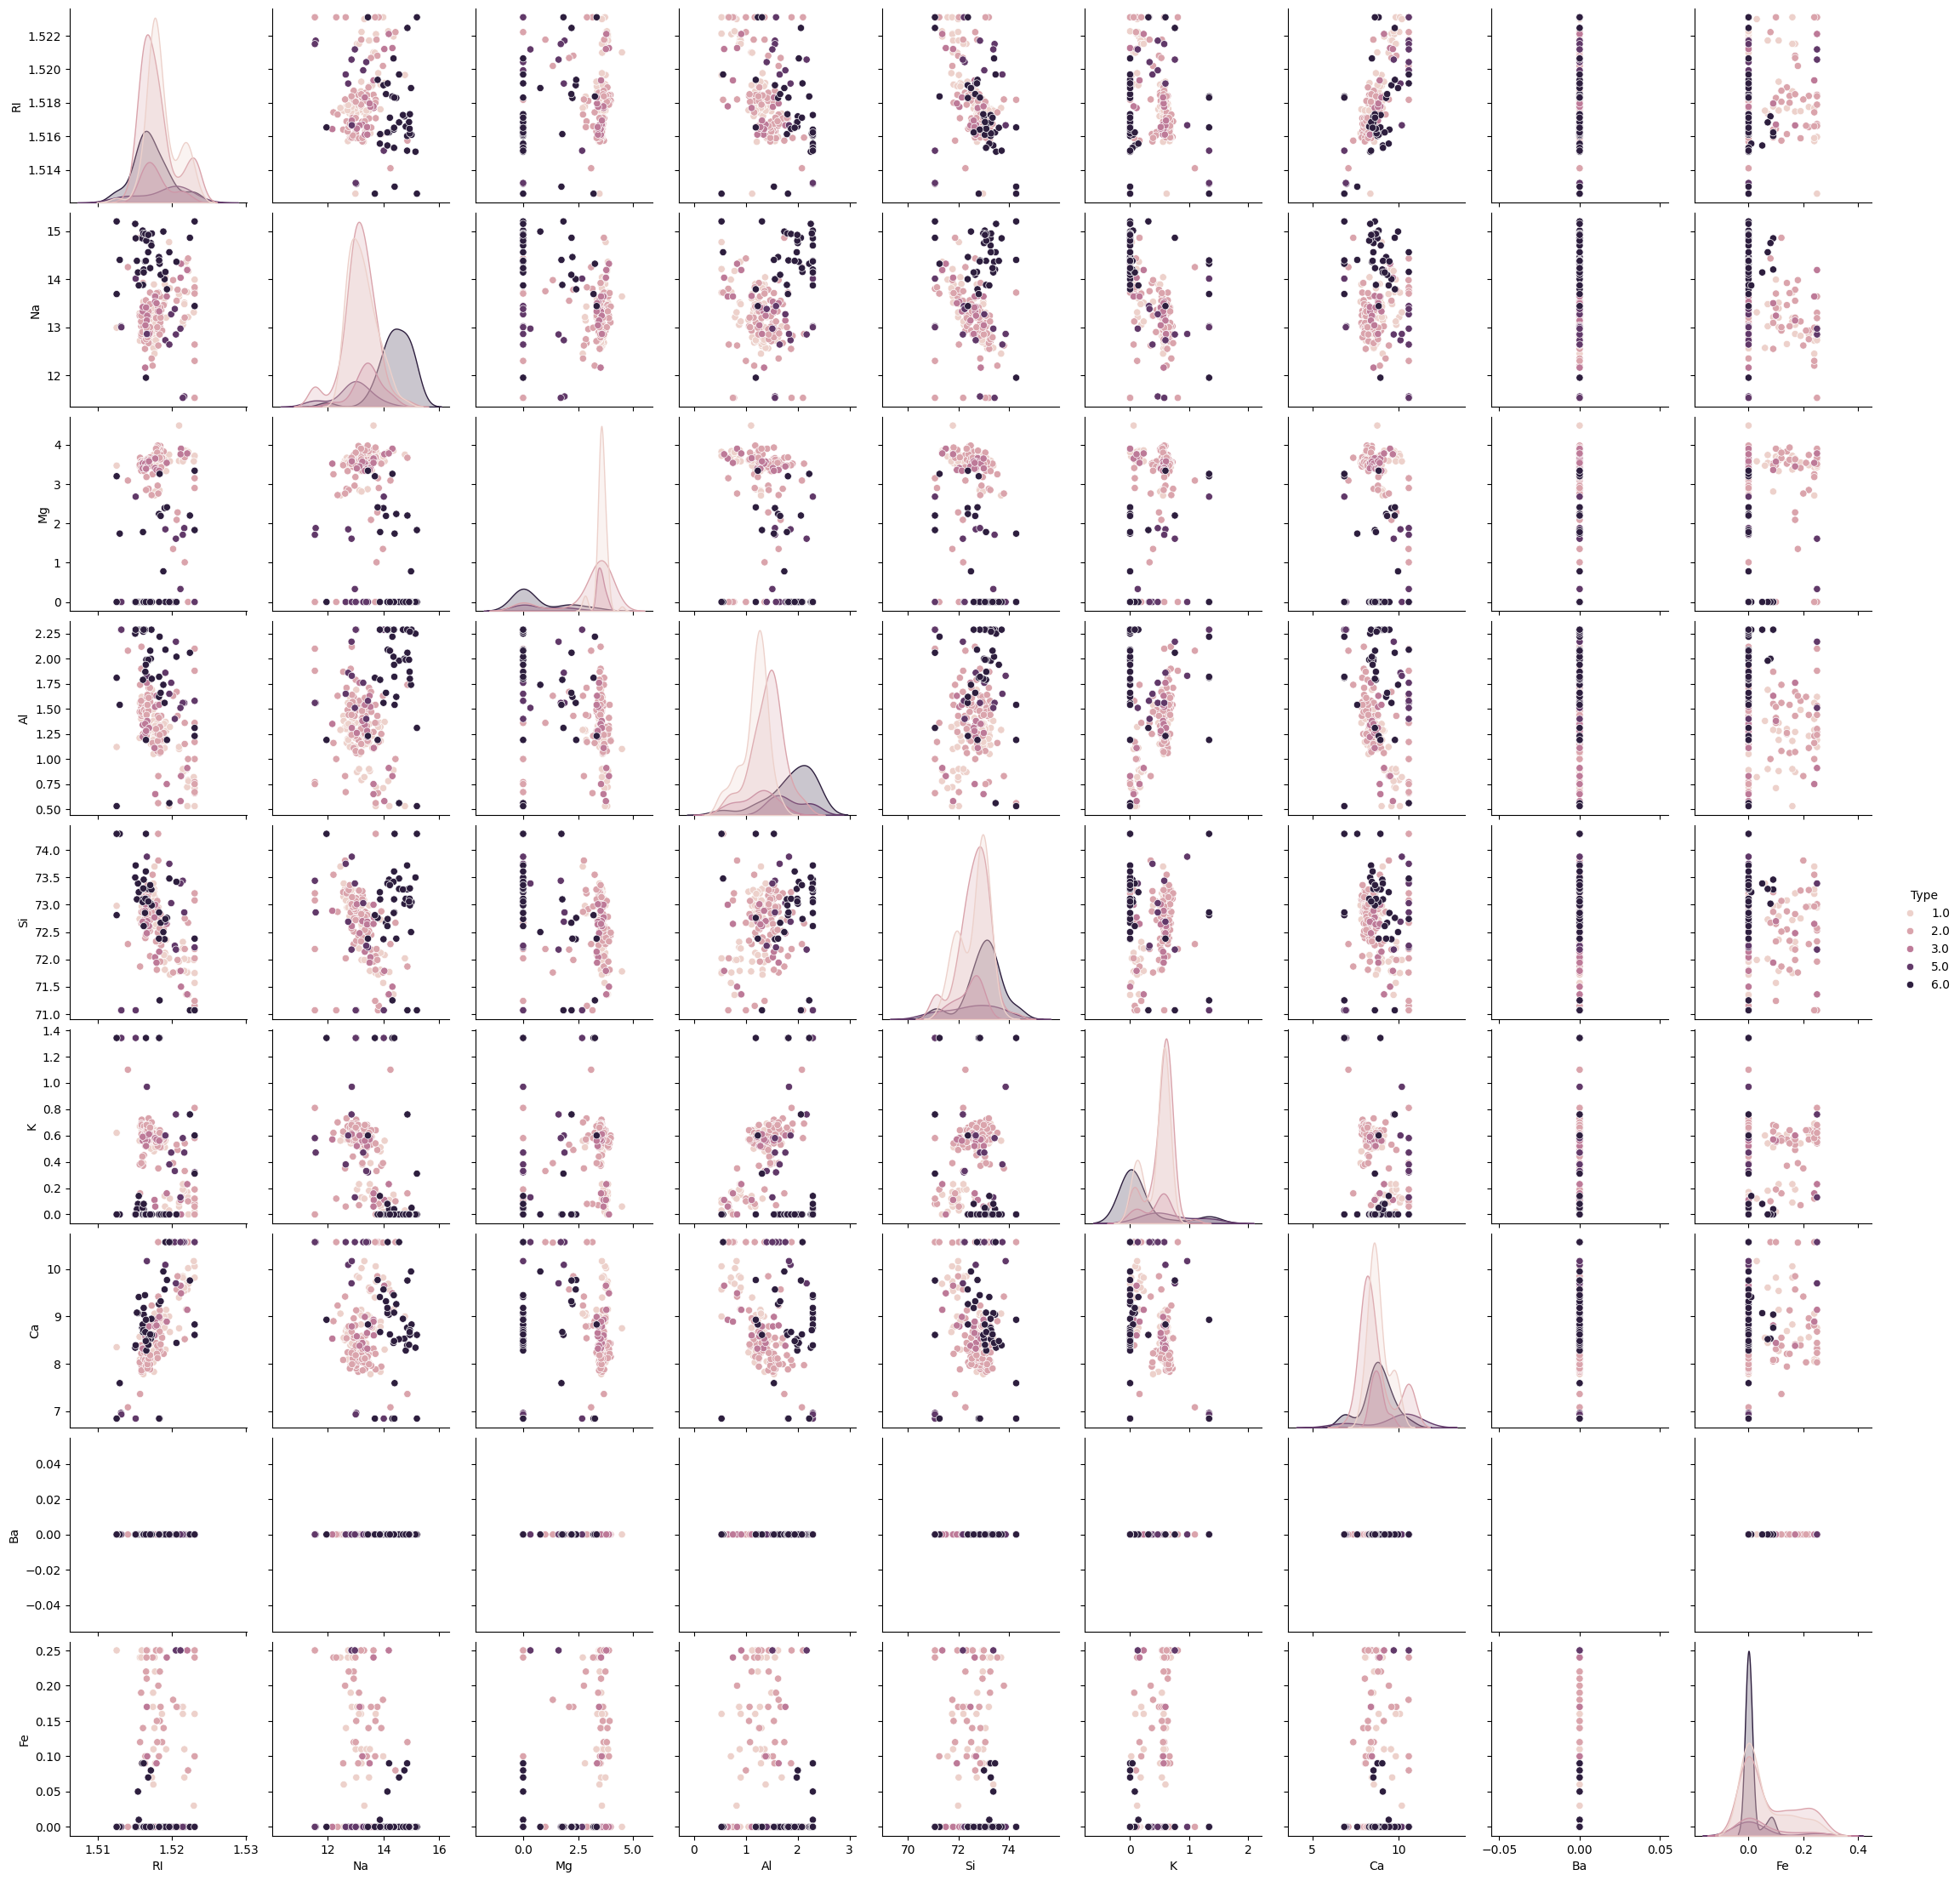

In [16]:
sns.pairplot(df, hue=df.columns[-1])
plt.show()

In [17]:
#  Data Preprocessing
target= df.columns[-1]  
target

'Type'

In [18]:
feature= df.iloc[:-1]
feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.29,72.85,0.00,9.45,0.0,0.0,6.0
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0,6.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0,6.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0,6.0


In [19]:
X = df.drop(columns=['Type'])  # 'Type' is target in Glass dataset
y = df['Type']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [22]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [24]:
print("\n Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Random Forest Performance
Accuracy: 0.813953488372093
Precision: 0.839543692741367
Recall: 0.813953488372093
F1 Score: 0.8053806688387073

Classification Report:
               precision    recall  f1-score   support

         1.0       0.69      1.00      0.81        11
         2.0       0.82      0.64      0.72        14
         3.0       1.00      0.67      0.80         3
         5.0       1.00      0.50      0.67         4
         6.0       0.92      1.00      0.96        11

    accuracy                           0.81        43
   macro avg       0.88      0.76      0.79        43
weighted avg       0.84      0.81      0.81        43



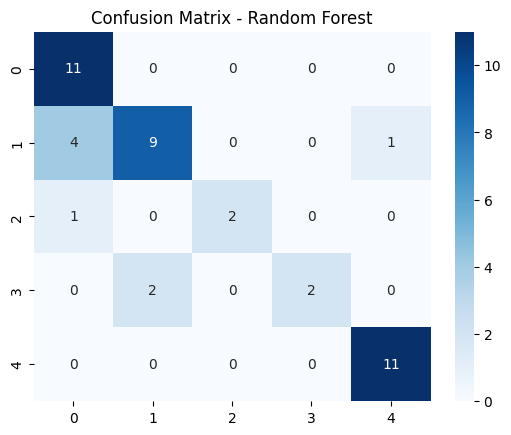

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

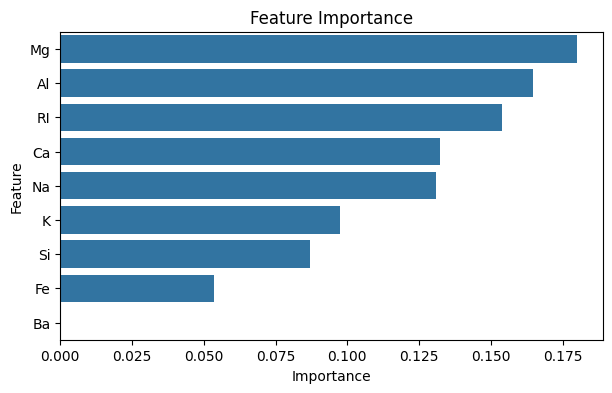

In [26]:
# Feature Importance Plot
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)

In [28]:
print("\n Bagging Results")
print("Accuracy:", accuracy_score(y_test, bag_pred))


 Bagging Results
Accuracy: 0.7906976744186046


In [29]:
boost_model = GradientBoostingClassifier(random_state=42)
boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)

print("\nBoosting Results")
print("Accuracy:", accuracy_score(y_test, boost_pred))


Boosting Results
Accuracy: 0.9069767441860465


## 1. Explain Bagging and Boosting methods. How is it different from each other.

### Bagging (Bootstrap Aggregation):
-> Many models are trained independently on different random samples of the data, and their predictions are averaged. It reduces variance and prevents overfitting
Example: Random Forest

### Boosting:
-> Models are trained one after another, each new model focuses on correcting errors made by the previous ones.It reduces bias and improves accuracy.
Examples: AdaBoost, Gradient Boosting, XGBoost

### Difference:

-> Bagging trains models independently, while boosting trains models one after another by correcting previous errors.

-> Bagging reduces variance(Overfitting), boosting reduces bias(Underfitting).

## 2. Explain how to handle imbalance in the data.

-> Imbalanced data means one class has much fewer samples than the other, so the model favors the majority class.

Handling Imbalance:

a) Oversampling minority class
b) Undersampling majority class
c) Using better metrics like Recall, F1-score, and ROC-AUC instead of accuracy.